In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


Dataset taken from: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

In [52]:
df = pd.read_csv('datasets/adult.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Need to convert the <=50k and >50k to numerical form

In [57]:
df.loc[df['class'] == '<=50K', 'class'] = 0
df.loc[df['class'] == '>50K', 'class'] = 1

In [60]:
df['class'].unique()

array([0, 1], dtype=object)

## Check split of data

As you can see, this is not fantastic as we would have wanted the most balanced data set. However, this is probably not possible because there are less people on a higher pay rate naturally.

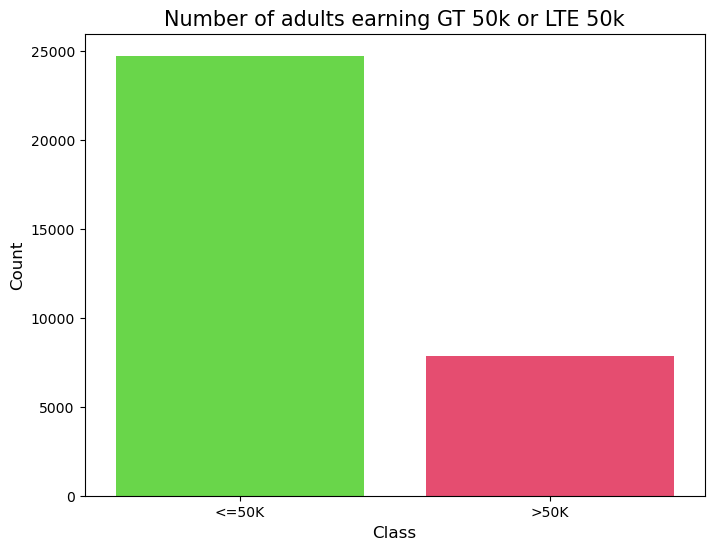

In [72]:
count = df['class'].value_counts()

count.index = ['<=50K', '>50K']

plt.figure(figsize=(8, 6))

sns.barplot(x = count.index, 
            y = count.values, 
            alpha=0.8, 
            palette='prism')

plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title("Number of adults earning GT 50k or LTE 50k", fontsize=15)
plt.show()


## Encode the labels to numerical values

In [76]:
labels = LabelEncoder()

for col in df.columns:
    df[col] = labels.fit_transform(df[col])
    
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,22,7,2671,9,12,4,1,1,4,1,25,0,39,39,0
1,33,6,2926,9,12,2,4,0,4,1,0,0,12,39,0
2,21,4,14086,11,8,0,6,1,4,1,0,0,39,39,0
3,36,4,15336,1,6,2,6,0,2,1,0,0,39,39,0
4,11,4,19355,9,12,2,10,5,2,0,0,0,39,5,0


In [79]:
df = df.drop(['fnlwgt'], axis=1)


## Plot the violin graph to visualise the data

[Text(0, 0, 'age'),
 Text(1, 0, 'workclass'),
 Text(2, 0, 'education'),
 Text(3, 0, 'education-num'),
 Text(4, 0, 'marital-status'),
 Text(5, 0, 'occupation'),
 Text(6, 0, 'relationship'),
 Text(7, 0, 'race'),
 Text(8, 0, 'sex'),
 Text(9, 0, 'capital-gain'),
 Text(10, 0, 'capital-loss'),
 Text(11, 0, 'hours-per-week'),
 Text(12, 0, 'native-country')]

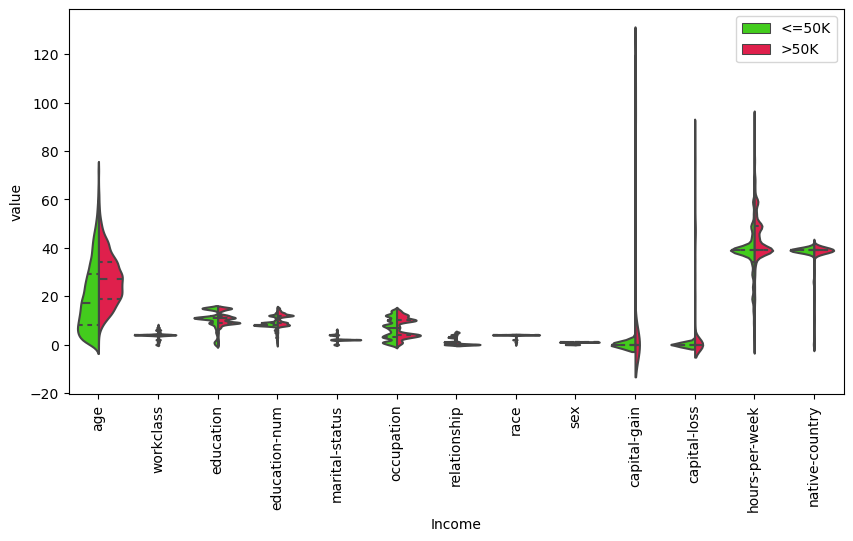

In [81]:
df_div = pd.melt(df, 'class', var_name='Income')

fig, ax = plt.subplots(figsize=(10, 5))

p = sns.violinplot(ax=ax, 
                   x='Income', 
                   y='value', 
                   hue='class', 
                   split=True, 
                   data=df_div, 
                   inner='quartile', 
                   palette='prism')

handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, [{'0': '<=50K', '1': '>50K'}[label] for label in labels])


df_no_class = df.drop(['class'],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns))